In [1]:
#Full Name: Akhilesh Kumar
#Uplevel Email Address: 2412.akhi.photon@gmail.com
#Name of the Problem Statement of Submission: Forecasting Volcanic Eruption and Impact Assessment

In [2]:
#Problem Statement:

#The problem at hand entails analyzing a sequence of sensor readings taken at consecutive time steps to address two distinct tasks related to volcanic eruptions. Firstly, the aim is to devise an effective approach that accurately estimates the remaining time units until eruption for a given observation. This observation can have sensor readings of varying lengths. By leveraging the information within the sensor data, the objective is to provide timely predictions for the impending eruption, enabling proactive measures to be taken to ensure the safety of affected areas and populations.
#The second task involves estimating the magnitude of the impending volcanic eruption. Utilizing the provided observation, the goal is to develop a methodology that can estimate the severity and intensity of the eruption event. Despite the absence of the eruption magnitude in the observations, it is possible to estimate the tilt erupt value, which represents the last sensor reading corresponding to the moment of eruption. This particular value exhibits a strong correlation with the magnitude of the eruption. By estimating the tilt erupt value, we can obtain a reliable estimation of the eruption's impact. The obtained estimation is crucial for emergency management and response planning, allowing authorities to allocate appropriate resources and implement necessary measures to mitigate the potential impacts of the volcanic eruption on surrounding areas.

In [3]:
# Get a list of all CSV files in the specified directory

In [11]:
import pandas as pd 
import random as rand
import glob
import numpy as np
import tsfresh
from tsfresh import extract_features
import lazypredict 
from lazypredict.Supervised import LazyClassifier
import matplotlib
from matplotlib import pyplot
import numpy as np
from scipy.stats import boxcox


# Get a list of all CSV files in the specified directory
txt_files = glob.glob('./Volcano_Data/Volcano_Dataset/*/*.txt')
filesCount = len(txt_files)
numberOfSubsequence = 1
lengthOfSubsequence = 5
fileCounter = 0
rowIndex = 0
maxObservationLength = 1600
minObservationLength = 900
totalObservations = (filesCount*numberOfSubsequence*lengthOfSubsequence)


In [5]:
#Create 2D array to store the observation#, timeToErupt and Pressure( 3 columns) and observation sequence

In [12]:
timeTwoDimArray = [[0.0 for i in range(3)] for j in range(filesCount*numberOfSubsequence*lengthOfSubsequence)]

# Loop through each CSV file and read its contents into a dataframe
for txt_file in txt_files:
    fileCounter +=1
    df = pd.read_csv(txt_file,sep=' ', header=None, names=['Column1', 'Column2'])
    timeList = df.Column1[14].split(',') #read 15th line for time
    pressureList = df.Column1[15].split(',') #read 16th line for pressure
    subsequenceCounter = 1
    while subsequenceCounter <= numberOfSubsequence:
        randomTimeElem = rand.choice(timeList) #pick random element from list of time
        timeElemIndex = timeList.index(randomTimeElem) #index of random time elem
        timeSubSequence = timeList[timeElemIndex:timeElemIndex+lengthOfSubsequence:1] # take consecutive 5 time elements 
        pressureSubSequence = pressureList[timeElemIndex:timeElemIndex+lengthOfSubsequence:1] # take consecutive 5 time elements 
        for time,pressure in zip(timeSubSequence,pressureSubSequence):
            timeTwoDimArray[rowIndex][0] = fileCounter 
            timeTwoDimArray[rowIndex][1] = time
            timeTwoDimArray[rowIndex][2] = pressure
            rowIndex +=1
        subsequenceCounter+=1
print("Shape of timeTwoDimArray: {np.shape(timeTwoDimArray)}")
print("First 5 rows of timeTwoDimArray:\n{timeTwoDimArray[:5]}")
timeObservationDataFrame = pd.DataFrame(timeTwoDimArray) #format 2D array for print
timeObservationDataFrame.columns = ['Observation', 'TimeToErupt','Pressure'] 
print('timeObservationDataFrame:\n', timeObservationDataFrame)
absTimeObservationDataFrame = abs((timeObservationDataFrame.fillna(0)).astype(float))
print('absolute TimeObservationDataFrame:\n', absTimeObservationDataFrame)
time_column = absTimeObservationDataFrame.iloc[:, -2]
mostRecentTimeDataFrame = pd.DataFrame(time_column)
print('mostRecentTimeDataFrame:\n', mostRecentTimeDataFrame)


Shape of timeTwoDimArray: {np.shape(timeTwoDimArray)}
First 5 rows of timeTwoDimArray:
{timeTwoDimArray[:5]}
timeObservationDataFrame:
      Observation TimeToErupt               Pressure
0           1.00        -646  -2.36359384900875e-10
1           1.00        -645   5.43143154945526e-11
2           1.00        -644   1.99794999092525e-11
3           1.00        -643  -6.42235464605284e-11
4           1.00        -642  -4.97413538612904e-11
..           ...         ...                    ...
940         0.00        0.00                   0.00
941         0.00        0.00                   0.00
942         0.00        0.00                   0.00
943         0.00        0.00                   0.00
944         0.00        0.00                   0.00

[945 rows x 3 columns]
absolute TimeObservationDataFrame:
      Observation  TimeToErupt  Pressure
0           1.00       646.00      0.00
1           1.00       645.00      0.00
2           1.00       644.00      0.00
3           1.00    

In [7]:
# Calculate the min, max, median, avg and standard deviation for  most Recent Time Data 

In [8]:

min_values = mostRecentTimeDataFrame.min(axis=0)
max_values = mostRecentTimeDataFrame.max(axis=0)
median_values = mostRecentTimeDataFrame.median(axis=0)
avg_values = mostRecentTimeDataFrame.mean(axis=0)
std_values = mostRecentTimeDataFrame.std(axis=0)

print('Calculate the min, max, median, and standard deviation of each column on mostRecentTimeDataFrame:')
print("Min values:", min_values)
print("Max values:", max_values)
print("Median values:", median_values)
print("Average values:", avg_values)
print("Standard deviation values:", std_values)


Calculate the min, max, median, and standard deviation of each column on mostRecentTimeDataFrame:
Min values: TimeToErupt   0.00
dtype: float64
Max values: TimeToErupt   1481.00
dtype: float64
Median values: TimeToErupt   647.00
dtype: float64
Average values: TimeToErupt   658.79
dtype: float64
Standard deviation values: TimeToErupt   404.80
dtype: float64


In [9]:
# line plot using boxcox and histogram

ValueError: supplied range of [-inf, 7.300472814267799] is not finite

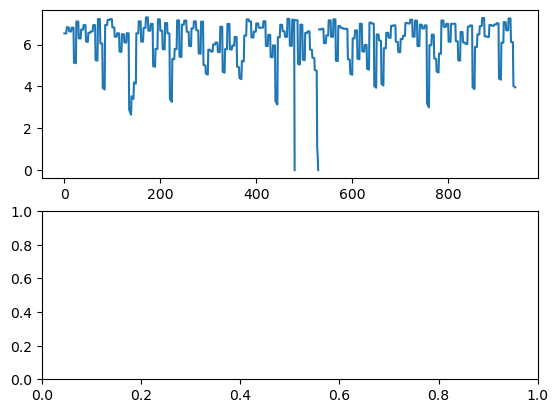

In [10]:
# line plot
pyplot.subplot(211)
pyplot.plot(boxcox(mostRecentTimeDataFrame['TimeToErupt'], lmbda=0.0))

# histogram
pyplot.subplot(212)
pyplot.hist(boxcox(mostRecentTimeDataFrame['TimeToErupt'], lmbda=0.0))
pyplot.show()


In [ ]:
# Use TS fresh lib to extract feature from time series

In [13]:
print('Use TS fresh lib to extract feature from time series:')

# Extract the features
extracted_features = extract_features(absTimeObservationDataFrame, column_id='TimeToErupt',column_sort='TimeToErupt')

# Print the features
print(extracted_features.head())


Use TS fresh lib to extract feature from time series:


Feature Extraction:   0%|                                                                                                                                                            | 0/20 [00:03<?, ?it/s]


TypeError: acf() got an unexpected keyword argument 'unbiased'

In [ ]:
#Use Lazy preditor lib to calculate prediction models from time series

In [14]:
from lazypredict.Supervised import LazyClassifier, LazyRegressor
from sklearn.model_selection import train_test_split
from sklearn.utils import Bunch


# Convert DataFrame to a dataset object
dataset = Bunch(data=absTimeObservationDataFrame.drop(columns=['Pressure','Observation']), target=mostRecentTimeDataFrame['TimeToErupt'])

# Now, dataset contains both the features (data) and target
print('dataset.data', dataset.data)
print('dataset.target', dataset.target)


# Load dataset (replace this with your own data)
X, y =dataset.data, dataset.target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# LazyRegressor for regression task
reg = LazyRegressor(predictions=True)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)


dataset.data      TimeToErupt
0         646.00
1         645.00
2         644.00
3         643.00
4         642.00
..           ...
940         0.00
941         0.00
942         0.00
943         0.00
944         0.00

[945 rows x 1 columns]
dataset.target 0     646.00
1     645.00
2     644.00
3     643.00
4     642.00
       ...  
940     0.00
941     0.00
942     0.00
943     0.00
944     0.00
Name: TimeToErupt, Length: 945, dtype: float64


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 42/42 [00:02<00:00, 14.09it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000077 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 252
[LightGBM] [Info] Number of data points in the train set: 756, number of used features: 1
[LightGBM] [Info] Start training from score 654.289683
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [ ]:
#END OF PROBLEM 1